In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("assignemt 1.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.isnull().sum()

Email                    0
Address                  0
Avatar                   0
Avg. Session Length      0
Time on App              0
Time on Website          0
Length of Membership    48
Yearly Amount Spent      5
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  452 non-null    float64
 7   Yearly Amount Spent   495 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#Fill the missing data using zeros

In [6]:
df1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df1['Length of Membership'] = df1['Length of Membership'].fillna(0)
df1['Yearly Amount Spent'] = df1['Yearly Amount Spent'].fillna(0)

In [8]:
df1.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

The correlation of the on filling the columns with Zeros =  0.41313914231628096


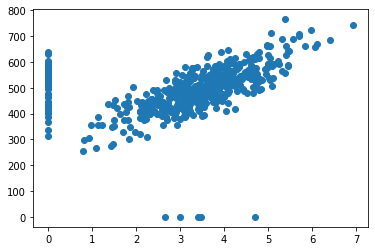

In [9]:
print('The correlation of the on filling the columns with Zeros = ',np.corrcoef(df1['Length of Membership'], df1['Yearly Amount Spent'])[0][1])
plt.scatter(df1['Length of Membership'], df1['Yearly Amount Spent']);

#Fill the missing data using the mean of their column

In [10]:
df2.isnull().sum()

Email                    0
Address                  0
Avatar                   0
Avg. Session Length      0
Time on App              0
Time on Website          0
Length of Membership    48
Yearly Amount Spent      5
dtype: int64

In [11]:
df2['Length of Membership'] = df2['Length of Membership'].fillna(df2['Length of Membership'].mean())
df2['Yearly Amount Spent'] = df2['Yearly Amount Spent'].fillna(df2['Yearly Amount Spent'].mean())

The correlation of the on filling the columns with the mean =  0.7690884480151032


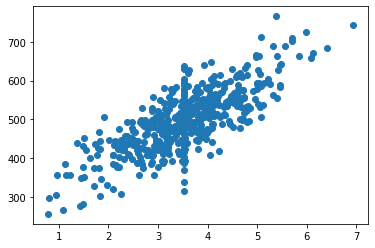

In [12]:
print('The correlation of the on filling the columns with the mean = ',np.corrcoef(df2['Length of Membership'], df2['Yearly Amount Spent'])[0][1])
plt.scatter(df2['Length of Membership'], df2['Yearly Amount Spent']);

#Fill the missing data using the median of their column

In [13]:
df3.isnull().sum()

Email                    0
Address                  0
Avatar                   0
Avg. Session Length      0
Time on App              0
Time on Website          0
Length of Membership    48
Yearly Amount Spent      5
dtype: int64

In [14]:
df3['Length of Membership'] = df3['Length of Membership'].fillna(df3['Length of Membership'].median())
df3['Yearly Amount Spent'] = df3['Yearly Amount Spent'].fillna(df3['Yearly Amount Spent'].median())

The correlation of the on filling the columns with the median =  0.7690737785758239


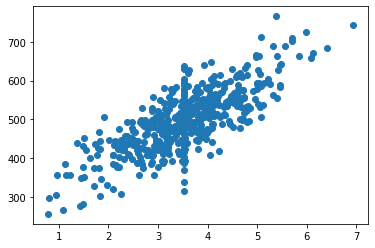

In [15]:
print('The correlation of the on filling the columns with the median = ',np.corrcoef(df3['Length of Membership'], df3['Yearly Amount Spent'])[0][1])
plt.scatter(df3['Length of Membership'], df3['Yearly Amount Spent']);

Correlation values
###1. Mean: 0.769088
###2. Median : 0.769073
###3. Zeros: 0.413139

It can be noticed that filling the two columns with zeros gave a very low correlation but on filling it with the mean gave a higher correlation.
#####While on filling it with the median it gave a correlation very close to that of the mean
##Therefore i recommend filling the missing value with the Mean

#PCA 

In [16]:
df4 = df3.copy()

In [17]:
df4.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [18]:
x = df4.loc[:,['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [19]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [21]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X = pca.fit_transform(X)

In [22]:
X = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])

In [23]:
X.head()

,principal component 1,principal component 2
0,-1.377262,1.545167
1,-0.060425,-1.623760
2,0.430496,0.179422
3,-0.322826,0.909631
4,-0.613806,1.177627


In [24]:
df5 = pd.concat([X, df4[['Yearly Amount Spent']]], axis = 1)

In [25]:
df5.head()

,principal component 1,principal component 2,Yearly Amount Spent
0,-1.377262,1.545167,587.951054
1,-0.060425,-1.623760,392.204933
2,0.430496,0.179422,487.547505
3,-0.322826,0.909631,581.852344
4,-0.613806,1.177627,599.406092
